In [2]:
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
import seaborn as sns

path = 'C:\\Users\\staff\\Desktop\\Математика,машинное_обучение\\Практика\\datasets_746333_1291933_survey lung cancer.csv'
df = pd.read_csv(path)
df_smok = df['SMOKING'] - 1 
df_dis = df['CHRONIC DISEASE'] - 1 
df_cough = df['COUGHING'] - 1 
df_pain = df['CHEST PAIN'] - 1 
df_SHORTNESS_OF_BREATH = df['SHORTNESS OF BREATH'] - 1 
df["SHORTNESS OF BREATH"].update(df_SHORTNESS_OF_BREATH)
df["SMOKING"].update(df_smok)
df["CHRONIC DISEASE"].update(df_dis)
df["COUGHING"].update(df_cough)
df["CHEST PAIN"].update(df_pain)

df = df[['GENDER', 'AGE', 'SMOKING', 'CHRONIC DISEASE', 'COUGHING', 'CHEST PAIN', "SHORTNESS OF BREATH", 'LUNG_CANCER']]
df

,GENDER,AGE,SMOKING,CHRONIC DISEASE,COUGHING,CHEST PAIN,SHORTNESS OF BREATH,LUNG_CANCER
0,M,69,0,0,1,1,1,YES
1,M,74,1,1,0,1,1,YES
2,F,59,0,0,1,1,1,NO
3,M,63,1,0,0,1,0,NO
4,F,63,0,0,1,0,1,NO
...,...,...,...,...,...,...,...,...
304,F,56,0,1,1,0,1,YES
305,M,70,1,0,1,1,1,YES
306,M,58,1,0,1,1,0,YES
307,M,67,1,0,1,1,1,YES


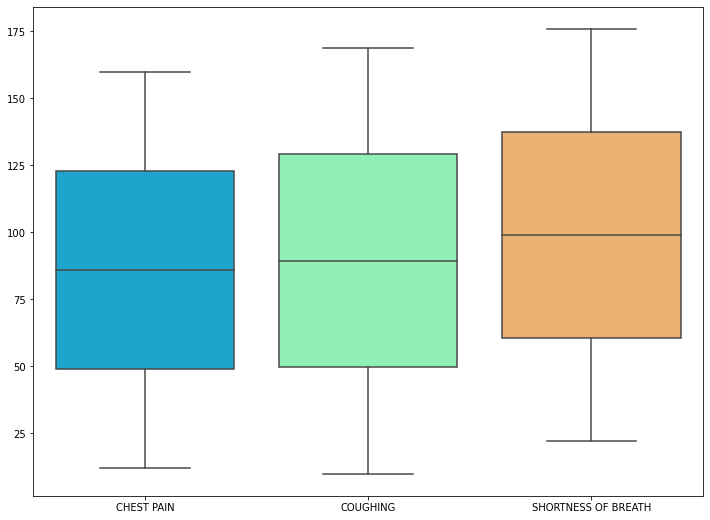

In [169]:
df_clear = df.groupby('LUNG_CANCER')[['CHEST PAIN', 'COUGHING', "SHORTNESS OF BREATH"]].sum()
sns.boxplot(data=df_clear, palette='rainbow')
#По данным полученным из боксплотов можно предпложить, что выраженных различий в частоте представленных симптомов нет. 


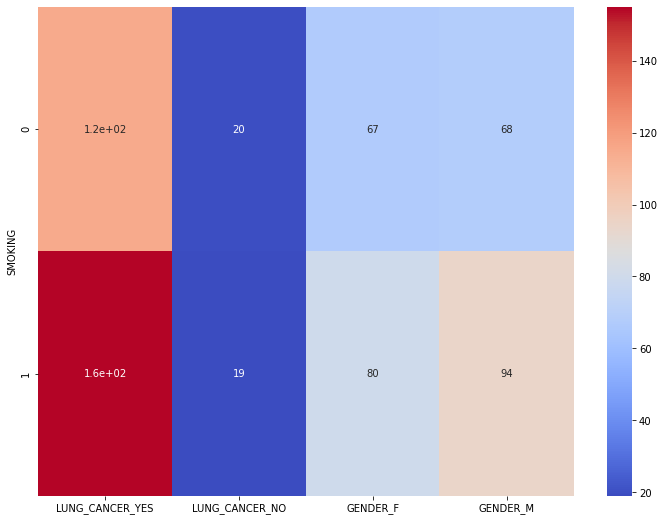

In [6]:
df_with_dummies = pd.get_dummies(df, columns=['LUNG_CANCER', 'GENDER'])
df_smoking = df_with_dummies.groupby('SMOKING')[['LUNG_CANCER_YES', 'LUNG_CANCER_NO', 'GENDER_F', 'GENDER_M']].sum()
df_smoking
sns.heatmap(df_smoking,cmap='coolwarm',annot=True)
#Согласно тепловой карте курильщики чаще страдают раком легкого, мужчины курят чаще. 


In [7]:
df_smoking

,LUNG_CANCER_YES,LUNG_CANCER_NO,GENDER_F,GENDER_M
SMOKING,,,,
0,115,20,67,68
1,155,19,80,94
